# Binary classification

<strong>Abstract</strong>  
In this notebook, neural networks will be build for classifying movie reviews provided by IMDB. This is a <strong>binary classification</strong> example.

<strong>Reference</strong>  
See pages 68-77 of "<strong>Deep Learning with Python</strong>" by Francois Chollet (2018). 

<strong>Summary (page 77)</strong>  
- For a binary classification problem, the final activation function should be sigmoid, which returns a value between 0 and 1.
- An appropreate loss function is binary_crossentropy.
- Check whether there is a problem of overfitting.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Loading IMDB dataset

The IMDB dataset will be loaded. This dataset is already preprocessed. The sequences of words are turned into sequences of integers. Each integer stands for a specific word. The label data (train_labels and test_labels) are lists of 0s and 1s, where 0 and 1 are for negative and positive reviews, respectively. 

In [14]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

print("train_data shape: {}".format(train_data.shape))
print("train_labels shape: {}".format(train_labels.shape))
print("test_data shape: {}".format(test_data.shape))
print("test_labels shape: {}".format(test_labels.shape))


train_data shape: (25000,)
train_labels shape: (25000,)
test_data shape: (25000,)
test_labels shape: (25000,)
-----------------------

The number of words in the first training data:  218


In [13]:
print("the first 5 train_data: \n{}".format(train_data[:5]))
print("the first 5 train_labes: \n{}".format(train_labels[:5]))

the first 5 train_data: 
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 82

Let us perform 0 paddding so that all data have the same length.

In [22]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i , sequence in enumerate(sequences):
    results[i,sequence] = 1.
  
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("length of the first training data: ", len(x_train[0]))
print("length of the second training data: ", len(x_train[1]))
print("length of the third training data: ", len(x_train[2]))

print("length of the first test data: ", len(x_test[0]))
print("length of the second test data: ", len(x_test[1]))
print("length of the third test data: ", len(x_test[2]))

length of the first training data:  10000
length of the second training data:  10000
length of the third training data:  10000
length of the first test data:  10000
length of the second test data:  10000
length of the third test data:  10000


In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

A validation set will be created from the original training dataset.

In [0]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

## Neural network 1

- two hidden layers
- number of units: 16
- loss function: binary_crossentropy
- activation function: relu

In [50]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_34 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.5178 - acc: 0.7827 - val_loss: 0.3897 - val_acc: 0.8677
Epoch 2/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.3117 - acc: 0.9014 - val_loss: 0.3132 - val_acc: 0.8842
Epoch 3/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.2273 - acc: 0.9267 - val_loss: 0.2783 - val_acc: 0.8904
Epoch 4/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1802 - acc: 0.9419 - val_loss: 0.3184 - val_acc: 0.8713
Epoch 5/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1473 - acc: 0.9527 - val_loss: 0.2894 - val_acc: 0.8849
Epoch 6/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1235 - acc: 0.9612 - val_loss: 0.2987 - val_acc: 0.8838
Epoch 7/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1020 - acc: 0.9688 - val_loss: 0.3177 - 

In [52]:
history_dict= history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

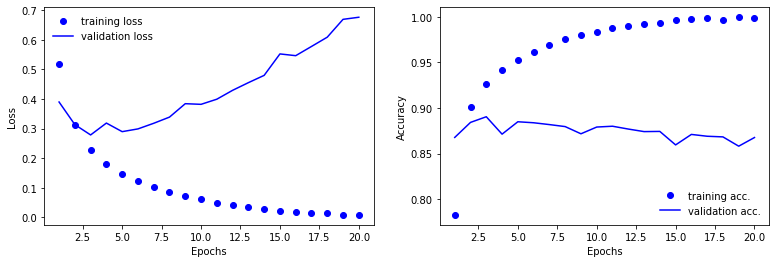

In [53]:
def visualize_history(history_dict):
  loss_values=history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values= history_dict['acc']
  val_acc_values= history_dict['val_acc']

  epochs = range(1,len(loss_values)+1)

  plt.figure(figsize=(13,4))
  plt.subplot(121)
  plt.plot(epochs, loss_values, 'bo', label='training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(frameon=False)

  plt.subplot(122)
  plt.plot(epochs, acc_values, 'bo', label='training acc.')
  plt.plot(epochs, val_acc_values, 'b', label = 'validation acc.')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(frameon=False)

  plt.show()

visualize_history(history_dict)

You can clearly see overfitting. In the next cell, the same model will be trained again, but only for 4 epochs to avoid the overfitting.

In [40]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=4,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 184us/step - loss: 0.5271 - acc: 0.7747 - val_loss: 0.4149 - val_acc: 0.8422
Epoch 2/4
15000/15000 [==============================] - 2s 138us/step - loss: 0.3168 - acc: 0.8987 - val_loss: 0.3118 - val_acc: 0.8881
Epoch 3/4
15000/15000 [==============================] - 2s 137us/step - loss: 0.2339 - acc: 0.9267 - val_loss: 0.2867 - val_acc: 0.8872
Epoch 4/4
15000/15000 [==============================] - 2s 140us/step - loss: 0.1852 - acc: 0.9424 - val_loss: 0.2778 - val_acc: 0.8892


In [41]:
results = model.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 6s 238us/step


[0.29326927030563354, 0.881]

## Neural network 2

Same as NN1
- two hidden layers
- number of units: 16
- loss function: binary_crossentropy
- activation function: relu

Only the optimizer is different.

In [54]:
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.5497 - acc: 0.7806 - val_loss: 0.4295 - val_acc: 0.8674
Epoch 2/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.3484 - acc: 0.8981 - val_loss: 0.3314 - val_acc: 0.8819
Epoch 3/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.2516 - acc: 0.9231 - val_loss: 0.3238 - val_acc: 0.8706
Epoch 4/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.1997 - acc: 0.9381 - val_loss: 0.2792 - val_acc: 0.8883
Epoch 5/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.1617 - acc: 0.9500 - val_loss: 0.2767 - val_acc: 0.8883
Epoch 6/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1344 - acc: 0.9586 - val_loss: 0.2954 - val_acc: 0.8846
Epoch 7/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1124 - acc: 0.9672 - val_loss: 0.2959 - 

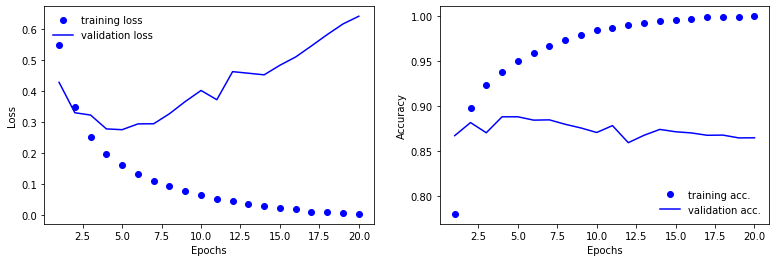

In [56]:
history_dict= history.history
visualize_history(history_dict)

In order to avoid overfitting, the model will be trained over 4 epochs.

In [57]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=4,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 183us/step - loss: 0.5495 - acc: 0.7516 - val_loss: 0.4224 - val_acc: 0.8535
Epoch 2/4
15000/15000 [==============================] - 2s 138us/step - loss: 0.3335 - acc: 0.8987 - val_loss: 0.3206 - val_acc: 0.8890
Epoch 3/4
15000/15000 [==============================] - 2s 138us/step - loss: 0.2398 - acc: 0.9261 - val_loss: 0.2852 - val_acc: 0.8914
Epoch 4/4
15000/15000 [==============================] - 2s 137us/step - loss: 0.1801 - acc: 0.9453 - val_loss: 0.2834 - val_acc: 0.8871


In [58]:
results = model.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 5s 186us/step


[0.2999872021770477, 0.88012]

## Neural network 3

- 3 hidden layers (instead of 2)
- number of units: 16
- loss function: binary_crossentropy
- activation function: relu

In [59]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.5349 - acc: 0.7611 - val_loss: 0.4059 - val_acc: 0.8479
Epoch 2/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.2958 - acc: 0.9015 - val_loss: 0.3085 - val_acc: 0.8763
Epoch 3/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.2167 - acc: 0.9252 - val_loss: 0.2916 - val_acc: 0.8824
Epoch 4/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1640 - acc: 0.9463 - val_loss: 0.2791 - val_acc: 0.8872
Epoch 5/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1313 - acc: 0.9553 - val_loss: 0.2922 - val_acc: 0.8873
Epoch 6/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1076 - acc: 0.9647 - val_loss: 0.3305 - val_acc: 0.8801
Epoch 7/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.0833 - acc: 0.9741 - val_loss: 0.3975 - 

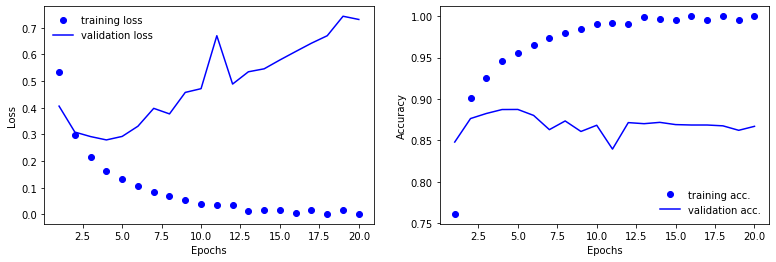

In [60]:
history_dict= history.history
visualize_history(history_dict)

In order to avoid overfitting, the model will be trained over 4 epochs.

In [61]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=4,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 194us/step - loss: 0.5459 - acc: 0.7707 - val_loss: 0.4017 - val_acc: 0.8684
Epoch 2/4
15000/15000 [==============================] - 2s 138us/step - loss: 0.3142 - acc: 0.9017 - val_loss: 0.3090 - val_acc: 0.8824
Epoch 3/4
15000/15000 [==============================] - 2s 137us/step - loss: 0.2246 - acc: 0.9239 - val_loss: 0.2853 - val_acc: 0.8863
Epoch 4/4
15000/15000 [==============================] - 2s 136us/step - loss: 0.1730 - acc: 0.9411 - val_loss: 0.2747 - val_acc: 0.8926


In [62]:
results = model.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 5s 183us/step


[0.29519664472579954, 0.88248]

## Neural network 4

- 2 hidden layers 
- number of units: 64 (instead of 16)
- loss function: binary_crossentropy
- activation function: relu

In [63]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 254us/step - loss: 0.4765 - acc: 0.7894 - val_loss: 0.3201 - val_acc: 0.8796
Epoch 2/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.2654 - acc: 0.9003 - val_loss: 0.2813 - val_acc: 0.8859
Epoch 3/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.1902 - acc: 0.9298 - val_loss: 0.3085 - val_acc: 0.8748
Epoch 4/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.1462 - acc: 0.9461 - val_loss: 0.2908 - val_acc: 0.8879
Epoch 5/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.1148 - acc: 0.9580 - val_loss: 0.3561 - val_acc: 0.8750
Epoch 6/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.0879 - acc: 0.9698 - val_loss: 0.3447 - val_acc: 0.8824
Epoch 7/20
15000/15000 [==============================] - 3s 196us/step - loss: 0.0730 - acc: 0.9758 - val_loss: 0.3794 - 

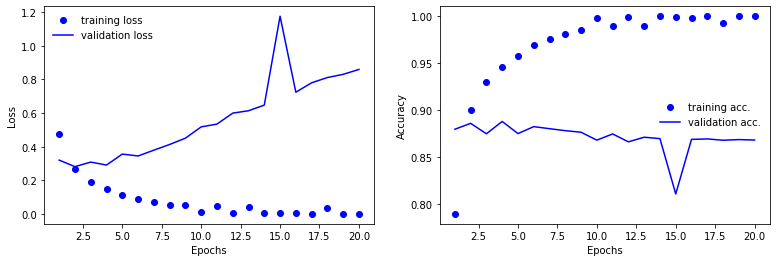

In [64]:
history_dict= history.history
visualize_history(history_dict)

In order to avoid overfitting, the model will be trained over 2 epochs.

In [65]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=2,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/2
15000/15000 [==============================] - 4s 268us/step - loss: 0.4855 - acc: 0.7721 - val_loss: 0.3472 - val_acc: 0.8583
Epoch 2/2
15000/15000 [==============================] - 3s 196us/step - loss: 0.2611 - acc: 0.9051 - val_loss: 0.2756 - val_acc: 0.8914


In [66]:
results = model.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 2s 92us/step


[0.2910332079124451, 0.88572]

## Neural network 5

- 2 hidden layers 
- number of units: 16
- loss function: mse
- activation function: relu

In [68]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='mse',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 217us/step - loss: 0.1762 - acc: 0.7822 - val_loss: 0.1254 - val_acc: 0.8680
Epoch 2/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.0968 - acc: 0.9018 - val_loss: 0.0965 - val_acc: 0.8857
Epoch 3/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.0686 - acc: 0.9289 - val_loss: 0.0890 - val_acc: 0.8852
Epoch 4/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.0529 - acc: 0.9431 - val_loss: 0.0842 - val_acc: 0.8891
Epoch 5/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.0431 - acc: 0.9538 - val_loss: 0.0868 - val_acc: 0.8832
Epoch 6/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.0360 - acc: 0.9635 - val_loss: 0.0833 - val_acc: 0.8861
Epoch 7/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.0294 - acc: 0.9713 - val_loss: 0.0855 - 

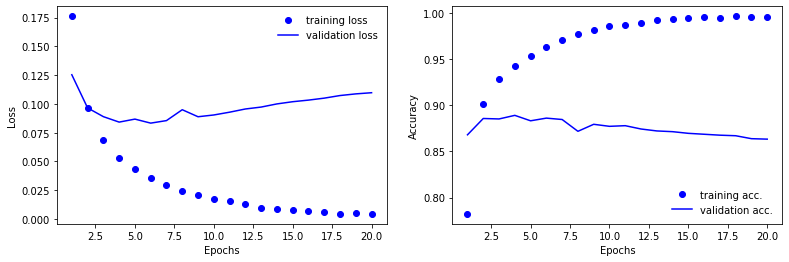

In [69]:
history_dict= history.history
visualize_history(history_dict)

In [70]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='mse',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=4,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 213us/step - loss: 0.1761 - acc: 0.7859 - val_loss: 0.1362 - val_acc: 0.8371
Epoch 2/4
15000/15000 [==============================] - 2s 139us/step - loss: 0.0969 - acc: 0.9021 - val_loss: 0.0961 - val_acc: 0.8865
Epoch 3/4
15000/15000 [==============================] - 2s 139us/step - loss: 0.0698 - acc: 0.9265 - val_loss: 0.0871 - val_acc: 0.8894
Epoch 4/4
15000/15000 [==============================] - 2s 141us/step - loss: 0.0538 - acc: 0.9449 - val_loss: 0.0845 - val_acc: 0.8877


In [71]:
results = model.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 4s 177us/step


[0.08975885879158974, 0.88148]

## Neural network 6

- 2 hidden layers 
- number of units: 16
- loss function: binary_crossentropy
- activation function: tanh (instead of relu)

In [72]:
model = models.Sequential()
model.add(layers.Dense(16,activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 318us/step - loss: 0.4809 - acc: 0.7992 - val_loss: 0.3575 - val_acc: 0.8752
Epoch 2/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.2724 - acc: 0.9122 - val_loss: 0.2904 - val_acc: 0.8861
Epoch 3/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1948 - acc: 0.9338 - val_loss: 0.2703 - val_acc: 0.8880
Epoch 4/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1463 - acc: 0.9526 - val_loss: 0.2918 - val_acc: 0.8852
Epoch 5/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1122 - acc: 0.9636 - val_loss: 0.3039 - val_acc: 0.8821
Epoch 6/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.0871 - acc: 0.9718 - val_loss: 0.3885 - val_acc: 0.8666
Epoch 7/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.0693 - acc: 0.9787 - val_loss: 0.3738 - 

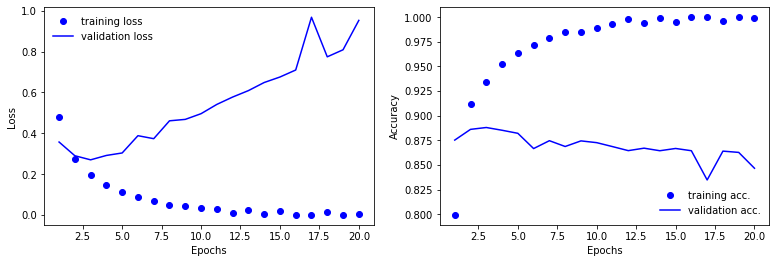

In [73]:
history_dict= history.history
visualize_history(history_dict)

In [74]:
model = models.Sequential()
model.add(layers.Dense(16,activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=3,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 3s 220us/step - loss: 0.4983 - acc: 0.7973 - val_loss: 0.3776 - val_acc: 0.8600
Epoch 2/3
15000/15000 [==============================] - 2s 142us/step - loss: 0.2846 - acc: 0.9074 - val_loss: 0.2874 - val_acc: 0.8892
Epoch 3/3
15000/15000 [==============================] - 2s 141us/step - loss: 0.2004 - acc: 0.9332 - val_loss: 0.2732 - val_acc: 0.8879


In [75]:
results = model.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 5s 185us/step


[0.2964186774349213, 0.87884]

## Neural network 6

- 4 hidden layers (instead of 2)
- number of units: 64 (instead of 16)
- loss function: binary_crossentropy
- activation function: relu

In [76]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 295us/step - loss: 0.5117 - acc: 0.7426 - val_loss: 0.4043 - val_acc: 0.8282
Epoch 2/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.2853 - acc: 0.8890 - val_loss: 0.2839 - val_acc: 0.8844
Epoch 3/20
15000/15000 [==============================] - 3s 199us/step - loss: 0.2063 - acc: 0.9218 - val_loss: 0.2762 - val_acc: 0.8900
Epoch 4/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.1541 - acc: 0.9418 - val_loss: 0.3123 - val_acc: 0.8841
Epoch 5/20
15000/15000 [==============================] - 3s 200us/step - loss: 0.1122 - acc: 0.9615 - val_loss: 0.4474 - val_acc: 0.8646
Epoch 6/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.1073 - acc: 0.9582 - val_loss: 0.3692 - val_acc: 0.8839
Epoch 7/20
15000/15000 [==============================] - 3s 200us/step - loss: 0.0928 - acc: 0.9737 - val_loss: 0.3964 - 

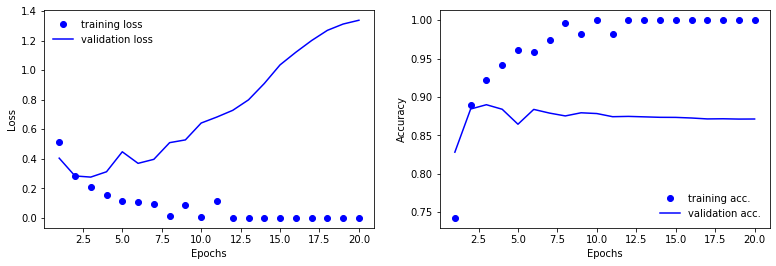

In [77]:
history_dict= history.history
visualize_history(history_dict)

In [78]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=2,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/2
15000/15000 [==============================] - 4s 293us/step - loss: 0.5209 - acc: 0.7425 - val_loss: 0.4656 - val_acc: 0.7998
Epoch 2/2
15000/15000 [==============================] - 3s 195us/step - loss: 0.2898 - acc: 0.8863 - val_loss: 0.3042 - val_acc: 0.8781


In [79]:
results = model.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 2s 94us/step


[0.32402512489318847, 0.86912]